# Coursera IBM Data Science Capstone Project - The Battle of the Neighborhoods

# (Final Submission - Week 2 of 2)

## Determining the Ideal Location for a New Gym in Austin, TX

#### Author: A.J. Murphy

### Table of Contents

* [Introduction](#introduction)
* [Business Problem](#problem)
* [Data](#dataset)
* [Methodology](#method)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)

### Introduction <a name="introduction"></a>

Obesity is a major problem in America, resulting in major health, social, and economic disruptions that have a devastating effect on the country.  According to the CDC, the annual medical cost of obesity was estimated at \\$147 billion in 2008 (1).  This equates to an average additional annual medical cost of $1,429 for an obese person as compared to a person of normal weight.  This does not even take into account the tertiary costs such as an increase in lost time at work due to higher rates of illness, injury or disability, or the higher insurance premiums that are incurred as a result of obesity (2).   

Obesity rates have been on the rise in America for decades.  In the last decade alone, the obesity rates have risen from 27.4% for adults in 2011 to 30.9% in 2018.  The adolescent obesity rate (students in grades 9-12) has risen from 10.5% in 2001 to 14.8% in 2017 (3).  In my home state of Texas, the prevalence of adult obesity was 34.8% in 2018.


### Business Problem <a name="problem"></a>

The best method to combat the rising obesity rates in America is to promote prevention of obesity before its onset.  According to the Center for Disease Control (CDC), the three primary strategies to prevent obesity include state and local programs, community efforts, and healthy living (4).    Within the healthy living strategy, one of the primary goals is to ensure an adequate amount of physical activity each week.   The current guideline for adults as of 2018 is 150 minutes of physical activity per week, or approximately 30 minutes per day, 5 days a week (5).  

A great way to achieve the recommended 150 minutes of physical activity per day is to utilize a gym membership.  Gyms offer a wide variety of options for physical activities, which can range from free weights and strength machines, to cardio machines such as treadmills and ellipticals, and many even offer group activities such as yoga and cardio classes.   The popularity of gyms has been on a steady rise, with total number of fitness center/health club memberships increasing from 32.8 million in 2000 to 60.87 million in 2017 (6).

Given the severity of the obesity epidemic that plagues our nation, as well as the increasing popularity of gyms, I believe that opening a gym would provide a good return-on-investment both from a monetary perspective, and also from the societal benefit that would be provided by promoting a healthier lifestyle.    Specifically, I believe that my home city of Austin is an ideal location to pursue opening a new gym, given Austin’s increasing popularity and rapidly growing population.   The population of Austin according to the 2010 census was 790,390, and the estimated population as of July 1, 2018 was 964,254, representing a 22% population increase over that timespan.

The target market for this gym would be the entire community in which it resides, as the gym would provide ample variety in activities that all age groups from adolescent to senior citizen would be able to partake and benefit from the physical activity, promoting healthier lifestyles and aiding in the prevention of obesity in Austin.

### Data <a name="dataset"></a>

To evaluate this business proposition, several data sets will be utilized.  The first data sets are the previously referenced CDC Obesity data and Austin Census data, as these will provide a good visualization of the obesity problem in America and reinforce the opportunity that opening a gym in Austin would provide.

The next data set will be a list of all US zip codes (7), from which we can determine all the zip codes within Austin, TX.  We will use this as the means by which we will cluster the city, and use data regarding current gym locations obtained from the FourSquare API to determine the area that is currently most underserved in regards to current gym locations within Austin, as that will provide a good indication of where to consider for opening a new gym (8).

### Methodology <a name="method"></a>

To properly manipulate, visualize, and analyze the aforementioned datasets, multiple resources will be utilized.  Jupyter Notebook, an open-source web application, will be used to utilize Python 3 programming code, which will be the primary means of collecting, analyzing, visualizing, and reviewing the data.  The Pandas Library, which offers data structures and operations for manipulating data, will be used to import the datasets from CSV and XLS files downloaded from the internet with data pertaining to US zip codes and data associated with the zip codes, US adult and adolescent obesity rates, and data regarding US gym memberships.  Pandas will then be used to extract the relevant data from each dataset and create new concise dataframes containing only the data that is required. 

Matplotlib, a plotting library in Python, will be used to create graphs to provide a good visualization of historical US adult obesity rates and of historical US health club/fitness center memberships to provide a tool for justifying the business purpose of opening a new gym.

GeoPy, a client for geocoding web services, will be used to take advantage of Nomatim API package, which will be used to determine the coordinates of Austin, TX via it’s search of OpenStreetMap based on the provided input of the city and state.  These coordinates will then be used to generate a map with help of the Folium package in Python.  Folium is a library that allows for a visualization of interactive spatial data.  Once this map is created, markers will be added to the map to indicate the exact location of all the zip codes within Austin city limits, by drawing on the zip code dataframe that was created using Pandas.

Next the Foursquare API will be accessed to search the top 100 venues within each zip code.  This list will be converted into a dataframe, and one-hot encoding will be used to determine the number of occurances of each venue category within each zip code.  The mean frequency of each category will then be taken and the updated dataframe will group the rows of the dataframe by zip code and the resulting mean frequency of each venue category.  This dataframe will be used to create a new dataframe which contains only the frequency of gyms in each zip code.  There are two categories that could be classified as a gym in Foursquare (“Gym”, and “Gym/ Fitness Center”), so frequency of both of these categories will be summed and the new dataframe will be grouped by zip code and the total frequency of the combined gym categories.

Next, the zip codes will be clustered into 5 clusters based on the mean frequency of occurrence of gyms in each zip code using k-means clustering from the Scikit-learn machine learning library in Python.  The resulting cluster labels will be added to the dataframe containing the zip codes and the coordinates and population of each zip code.  

The previously created Folium map displaying the city of Austin, with markers representing each zip code, will then be updated such that the markers are color-coded to identify which cluster each zip code belongs to. Finally, each cluster will be analyzed and the results will be reviewed to make a recommendation of the ideal location for a new gym in Austin, TX.


### Analysis <a name="analysis"></a>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import os # used to verify current working directory

import json # library to handle JSON files

!conda install -c anaconda xlrd --yes # read XLS files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import requests # library to handle requests

print("Libraries imported.")

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    xlrd-1.2.0                 |           py36_0         188 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be UPDATED:

  openssl            conda-forge::openssl-1.1.1f-h516909a_0 --> anaconda::openssl-1.1.1g-h7b6447c_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.4.5~ --> a

In [2]:
#create a new dataframe from the Excel spreadsheet downloaded from SimpleMaps Interactive Maps & Data (https://simplemaps.com/data/us-zips)
df_zip = pd.read_excel("uszips.xlsx")

In [3]:
#Pull the necessary columns from the df_zip dataframe and create a new dataframe with this data
df_zip_new = df_zip.filter(['zip','city','state_name','lat','lng','population'], axis=1)
df_zip_new.head()

,zip,city,state_name,lat,lng,population
0,601,Adjuntas,Puerto Rico,18.18004,-66.75218,17242
1,602,Aguada,Puerto Rico,18.36073,-67.17517,38442
2,603,Aguadilla,Puerto Rico,18.45439,-67.12202,48814
3,606,Maricao,Puerto Rico,18.16724,-66.93828,6437
4,610,Anasco,Puerto Rico,18.29032,-67.12243,27073


In [4]:
#create a dataframe that contains only data pertaining to Austin, TX
df_austin = df_zip_new.loc[df_zip_new['city']=='Austin']
df_austin

,zip,city,state_name,lat,lng,population
5115,16720,Austin,Pennsylvania,41.58410,-78.03708,1250
13569,42123,Austin,Kentucky,36.82162,-85.98925,786
15348,47102,Austin,Indiana,38.75868,-85.79088,6970
18745,55912,Austin,Minnesota,43.68155,-92.99022,28804
24740,72007,Austin,Arkansas,35.00246,-91.98193,7295
27356,78701,Austin,Texas,30.27049,-97.74235,9427
27357,78702,Austin,Texas,30.26327,-97.71432,23389
27358,78703,Austin,Texas,30.29409,-97.76571,20890
27359,78704,Austin,Texas,30.24315,-97.76537,48486
27360,78705,Austin,Texas,30.29437,-97.73855,33948


In [5]:
df_atx = df_austin.loc[df_austin['state_name']=='Texas']
df_atx

,zip,city,state_name,lat,lng,population
27356,78701,Austin,Texas,30.27049,-97.74235,9427
27357,78702,Austin,Texas,30.26327,-97.71432,23389
27358,78703,Austin,Texas,30.29409,-97.76571,20890
27359,78704,Austin,Texas,30.24315,-97.76537,48486
27360,78705,Austin,Texas,30.29437,-97.73855,33948
27361,78712,Austin,Texas,30.28502,-97.73477,860
27362,78717,Austin,Texas,30.48988,-97.75371,30218
27363,78719,Austin,Texas,30.14483,-97.67083,1815
27364,78721,Austin,Texas,30.27005,-97.68365,12492
27365,78722,Austin,Texas,30.28997,-97.71465,7110


After installing and importing all the required dependencies, the dataset containing US Zip Codes was imported from a XLS file using pandas and then stored as a dataframe.  The dataframe was filtered and cleaned to only retain the pertinent data regarding zip codes in Austin, TX .  The following was the resulting dataframe (df_atx):

In [6]:
#reset the index
df_atx.reset_index(inplace=True)
df_atx

,index,zip,city,state_name,lat,lng,population
0,27356,78701,Austin,Texas,30.27049,-97.74235,9427
1,27357,78702,Austin,Texas,30.26327,-97.71432,23389
2,27358,78703,Austin,Texas,30.29409,-97.76571,20890
3,27359,78704,Austin,Texas,30.24315,-97.76537,48486
4,27360,78705,Austin,Texas,30.29437,-97.73855,33948
5,27361,78712,Austin,Texas,30.28502,-97.73477,860
6,27362,78717,Austin,Texas,30.48988,-97.75371,30218
7,27363,78719,Austin,Texas,30.14483,-97.67083,1815
8,27364,78721,Austin,Texas,30.27005,-97.68365,12492
9,27365,78722,Austin,Texas,30.28997,-97.71465,7110


In [7]:
#rename the column headings
df_atx.rename(columns={'zip':'Zip_Code', 'city':'City','state_name':'State', 'lat':'Latitude','lng':'Longitude', 'population':'Population'}, inplace=True)

df_atx = df_atx.filter(['Zip_Code','City','State','Latitude','Longitude','Population'], axis=1)
df_atx

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Zip_Code,City,State,Latitude,Longitude,Population
0,78701,Austin,Texas,30.27049,-97.74235,9427
1,78702,Austin,Texas,30.26327,-97.71432,23389
2,78703,Austin,Texas,30.29409,-97.76571,20890
3,78704,Austin,Texas,30.24315,-97.76537,48486
4,78705,Austin,Texas,30.29437,-97.73855,33948
5,78712,Austin,Texas,30.28502,-97.73477,860
6,78717,Austin,Texas,30.48988,-97.75371,30218
7,78719,Austin,Texas,30.14483,-97.67083,1815
8,78721,Austin,Texas,30.27005,-97.68365,12492
9,78722,Austin,Texas,30.28997,-97.71465,7110


In [8]:
#make all values strings
df_atx.columns = list(map(str, df_atx.columns))
df_atx

,Zip_Code,City,State,Latitude,Longitude,Population
0,78701,Austin,Texas,30.27049,-97.74235,9427
1,78702,Austin,Texas,30.26327,-97.71432,23389
2,78703,Austin,Texas,30.29409,-97.76571,20890
3,78704,Austin,Texas,30.24315,-97.76537,48486
4,78705,Austin,Texas,30.29437,-97.73855,33948
5,78712,Austin,Texas,30.28502,-97.73477,860
6,78717,Austin,Texas,30.48988,-97.75371,30218
7,78719,Austin,Texas,30.14483,-97.67083,1815
8,78721,Austin,Texas,30.27005,-97.68365,12492
9,78722,Austin,Texas,30.28997,-97.71465,7110


In [9]:
#create a dataframe using the CSV file containing Adult Obesity Data that was downloaded from Centers for Disease Control and Prevention (https://nccd.cdc.gov/dnpao_dtm/rdPage.aspx?rdReport=DNPAO_DTM.ExploreByLocation&rdRequestForwarding=Form)
df_adult = pd.read_csv("AdultObesity.csv")

In [10]:
#Pull the necessary columns from the df_adult dataframe and create a new dataframe with this data
df_adult_new = df_adult.filter(['Description','Data_Value','state_name','lat','lng','population'], axis=1)
df_adult_new.head()

,Description,Data_Value
0,2011.0,27.4
1,2012.0,27.7
2,2013.0,28.3
3,2014.0,28.9
4,2015.0,28.9


In [11]:
df_adult_new.dropna(inplace=True)
df_adult_new

,Description,Data_Value
0,2011.0,27.4
1,2012.0,27.7
2,2013.0,28.3
3,2014.0,28.9
4,2015.0,28.9
5,2016.0,29.6
6,2017.0,30.1
7,2018.0,30.9


In [12]:
#rename the column headings
df_adult_new.rename(columns={'Description':'Year', 'Data_Value':'Obesity_Rate'}, inplace=True)

df_adult_new

,Year,Obesity_Rate
0,2011.0,27.4
1,2012.0,27.7
2,2013.0,28.3
3,2014.0,28.9
4,2015.0,28.9
5,2016.0,29.6
6,2017.0,30.1
7,2018.0,30.9


Pandas was then used to create a dataframe from a CSV file obtained from the Center for Disease Control and Prevention’s website, containing historical data of adult obesity rates in America.  Matplotlib was used to create the following plot.  This plot portrays the growing obesity rate in the United States, and is a good visualization of the vital importance to curb this consistent rise in the rate of obesity in the country:

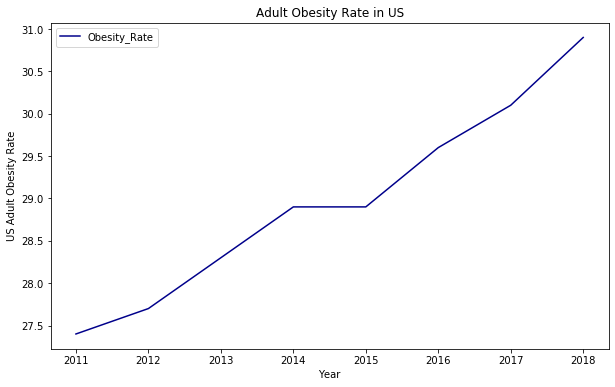

<Figure size 432x288 with 0 Axes>

In [13]:
#create a line plot of the Adult Obesity Rate in the US per year from the previously created df_adult_new dataframe
df_adult_new.plot(kind='line', x='Year', y='Obesity_Rate', figsize=(10, 6), color='darkblue')

plt.title('Adult Obesity Rate in US')
plt.xlabel('Year')
plt.ylabel('US Adult Obesity Rate')

plt.show()

plt.savefig('Adult Obesity.png')

In [14]:
#Create a new dataframe using pandas to read a Excel spreadsheet containing data about US Gym Memberships, data compiled from Statista (https://www.statista.com/statistics/236123/us-fitness-center--health-club-memberships/)
df_gyms = pd.read_excel("gym_memberships.xlsx")
df_gyms

,Year,Memberships
0,2000,32.80
1,2001,33.80
2,2002,36.30
3,2003,39.40
4,2004,41.30
5,2005,41.30
6,2006,42.70
7,2007,46.70
8,2008,45.60
9,2009,45.30


Pandas and Matplotlib were then utilized to perform a similar operation to create a graph displaying the historical trend of Health Club/Fitness Center Memberships in the US based on data obtained from the Statista website.  This graph conveys the ever-increasing popularity of gyms in the United States:

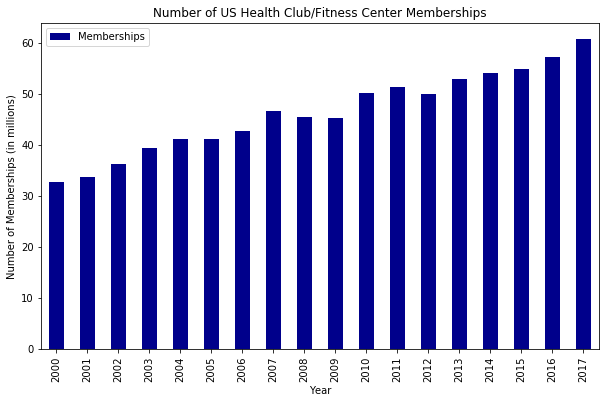

In [15]:
#Create a bar plot of the yearly number of US Healthclub/Fitness Center Memberships
df_gyms.plot(kind='bar', x='Year', y='Memberships', figsize=(10, 6), color='darkblue')

plt.title('Number of US Health Club/Fitness Center Memberships')
plt.xlabel('Year')
plt.ylabel('Number of Memberships (in millions)')

plt.show()

In [16]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


ModuleNotFoundError: No module named 'geocoder'

The GeoPy library utilized Nomatim to determine the coordinates of Austin, TX as 30.2711286 Latitude and -97.7436995 Longitude.  These coordinates were pushed to the Folium map creator to generate a map of the city of Austin.  A loop was then used to create a marker for each of the individual zip codes within Austin by utilizing the df_atx dataframe, and these markers were added to the map:

In [17]:
# get the coordinates of Austin, TX
address = 'Austin, TX'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Austin, TX {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Austin, TX 30.2711286, -97.7436995.


In [18]:
# create map of Austin using latitude and longitude values
map_atx = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map to represent each zip code
for lat, lng, zipcode in zip(df_atx['Latitude'], df_atx['Longitude'], df_atx['Zip_Code']):
    label = '{}'.format(zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_atx)  
    
map_atx

In [19]:
# define Foursquare Credentials and Version
CLIENT_ID = 'D4HXVQNDXW5CUUURE5OCA25QT0RXFHAQJGQ2VX4ZJJS25V1H' 
CLIENT_SECRET = 'L5TDNID4FG0ICW0XHIT51EKK21LPULT244SXYZQTEES1DMVY' 
VERSION = '20180604' # Foursquare API version


In [20]:
#check the first Zip Code in the df_atx dataframe
df_atx.loc[0, 'Zip_Code']

78701

In [21]:
#Check the coordinates of zip code 78701
zip_latitude = df_atx.loc[0, 'Latitude'] # neighborhood latitude value
zip_longitude = df_atx.loc[0, 'Longitude'] # neighborhood longitude value

zip_name = df_atx.loc[0, 'Zip_Code'] # neighborhood name

print('Latitude and longitude values of Zip Code {} are {}, {}.'.format(zip_name, 
                                                               zip_latitude, 
                                                               zip_longitude))

Latitude and longitude values of Zip Code 78701 are 30.27049, -97.74235.


In [22]:
#display the full df_atx dataframe
df_atx

,Zip_Code,City,State,Latitude,Longitude,Population
0,78701,Austin,Texas,30.27049,-97.74235,9427
1,78702,Austin,Texas,30.26327,-97.71432,23389
2,78703,Austin,Texas,30.29409,-97.76571,20890
3,78704,Austin,Texas,30.24315,-97.76537,48486
4,78705,Austin,Texas,30.29437,-97.73855,33948
5,78712,Austin,Texas,30.28502,-97.73477,860
6,78717,Austin,Texas,30.48988,-97.75371,30218
7,78719,Austin,Texas,30.14483,-97.67083,1815
8,78721,Austin,Texas,30.27005,-97.68365,12492
9,78722,Austin,Texas,30.28997,-97.71465,7110


In [23]:
# save the DataFrame as CSV file
df_atx.to_csv("df_atx.csv", index=False)

In [24]:
import requests # library to handle requests

At this point, the Foursquare API was called, using sandbox developer credentials, and a search was run to identify the top 100 venues within each zip code (with the radius set at1600 meters from the coordinates defined for each zip code), and the results were converted into a dataframe using Pandas. The following is what the first 5 results for the first zip code were displayed as using the “head” function:

In [25]:
#Use Foursquare API to return the top 100 venues within 1600 meters of the center of each zip code in Austin

radius = 1600
LIMIT = 100

venues = []

for lat, long, zipcode in zip(df_atx['Latitude'], df_atx['Longitude'], df_atx['Zip_Code']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            zipcode,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [26]:
#display results
results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '53763649498e0a8f200f15c9',
   'name': "Trader Joe's",
   'location': {'address': '9722 Great Hills Trail',
    'lat': 30.395284082296563,
    'lng': -97.75204814562647,
    'labeledLatLngs': [{'label': 'display',
      'lat': 30.395284082296563,
      'lng': -97.75204814562647},
     {'label': 'entrance', 'lat': 30.394931, 'lng': -97.750556}],
    'distance': 1193,
    'postalCode': '78759',
    'cc': 'US',
    'city': 'Austin',
    'state': 'TX',
    'country': 'United States',
    'formattedAddress': ['9722 Great Hills Trail',
     'Austin, TX 78759',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      's

In [27]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Zip_Code', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1744, 7)


,Zip_Code,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,78701,30.27049,-97.74235,Perry's Steakhouse,30.269374,-97.743676,Steakhouse
1,78701,30.27049,-97.74235,Paramount Theatre,30.269457,-97.742077,Movie Theater
2,78701,30.27049,-97.74235,Chi'lantro BBQ,30.270600,-97.741928,Food Truck
3,78701,30.27049,-97.74235,Caffé Medici,30.270119,-97.742154,Coffee Shop
4,78701,30.27049,-97.74235,The Townsend,30.269611,-97.742448,Lounge


In [28]:
#Find the count of total venues capture from foursquare API per zip code
venues_df.groupby(["Zip_Code"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Zip_Code,,,,,,
78701,100,100,100,100,100,100
78702,100,100,100,100,100,100
78703,40,40,40,40,40,40
78704,100,100,100,100,100,100
78705,100,100,100,100,100,100
78712,100,100,100,100,100,100
78717,13,13,13,13,13,13
78719,4,4,4,4,4,4
78721,34,34,34,34,34,34


To better analyze the data obtained from Foursquare, one-hot encoding was used to determine the count of each Venue Category occurrence for each zip code, and then the mean frequency of each occurrence of each Venue Category was taken and stored in a new dataframe, grouped by zip codes.  Since the target venue category is gyms, the two category groups that classified a venue as a gym (“Gym” and “Gym/ Fitness Center”) were summed together, and this total mean frequency was stored.

In [29]:
# one hot encoding
atx_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add zip code column back to dataframe
atx_onehot['Zip_Code'] = venues_df['Zip_Code'] 

# move zip code column to the first column
fixed_columns = [atx_onehot.columns[-1]] + list(atx_onehot.columns[:-1])
atx_onehot = atx_onehot[fixed_columns]

#print the shape of the dataframe
print(atx_onehot.shape)

#display first 5 rows of the dataframe
atx_onehot.head()

(1744, 297)


,Zip_Code,Adult Boutique,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Bike Trail,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Capitol Building,Caribbean Restaurant,Casino,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Bookstore,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Credit Union,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Turkish Restaurant,Used Bookstore,Vegetarian / Ve

In [30]:
#group rows by zip code and by taking the mean of the frequency of occurrence of each category
atx_grouped = atx_onehot.groupby(["Zip_Code"]).mean().reset_index()

print(atx_grouped.shape)
atx_grouped

(43, 297)


,Zip_Code,Adult Boutique,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Bike Trail,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Capitol Building,Caribbean Restaurant,Casino,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Bookstore,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Credit Union,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Turkish Restaurant,Used Bookstore,Vegetarian / Ve

In [32]:
#create dataframe containing only instances of a gym or fitness center category
atx_gym = atx_grouped[["Zip_Code","Gym / Fitness Center","Gym"]]

In [33]:
#display the dataframe
atx_gym

,Zip_Code,Gym / Fitness Center,Gym
0,78701,0.000000,0.010000
1,78702,0.000000,0.000000
2,78703,0.000000,0.000000
3,78704,0.020000,0.010000
4,78705,0.010000,0.010000
5,78712,0.000000,0.000000
6,78717,0.000000,0.000000
7,78719,0.000000,0.000000
8,78721,0.000000,0.029412
9,78722,0.010000,0.000000


In [34]:
#create a new column that combines the frequency of the two gym-related categories
sum_column = atx_gym["Gym / Fitness Center"] + atx_gym["Gym"]

In [35]:
#add the new sum column to the existing dataframe and display the updated dataframe
atx_gym["Gyms"] = sum_column
atx_gym

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Zip_Code,Gym / Fitness Center,Gym,Gyms
0,78701,0.000000,0.010000,0.010000
1,78702,0.000000,0.000000,0.000000
2,78703,0.000000,0.000000,0.000000
3,78704,0.020000,0.010000,0.030000
4,78705,0.010000,0.010000,0.020000
5,78712,0.000000,0.000000,0.000000
6,78717,0.000000,0.000000,0.000000
7,78719,0.000000,0.000000,0.000000
8,78721,0.000000,0.029412,0.029412
9,78722,0.010000,0.000000,0.010000


At this point, the Scikit learn library was used to run a k-means clustering on the dataframe containing the zip codes and the total mean frequency of the occurrence of a gym venue within the respective zip code, with 5 clusters being utilize.  The cluster labels were then appended to the df_atx dataframe and sorted, utilizing the “merge” and “sort” functions from Pandas.  The resulting dataframe contained the cluster labels for each zip code, along with the frequency of occurrence, coordinates, and population of each zip code in Austin, and the “head” function displays the following as the first five results of this merged and sorted dataframe (atx_merged):

In [36]:
# set number of clusters
kclusters = 5

atx_clustering = atx_gym.drop(["Zip_Code","Gym / Fitness Center","Gym"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(atx_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 4, 0, 0, 4, 4, 4, 0, 4], dtype=int32)

In [37]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
atx_merged = atx_gym.copy()

atx_merged = atx_gym.drop(["Gym / Fitness Center","Gym"], 1)

# add clustering labels
atx_merged["Cluster Labels"] = kmeans.labels_

In [38]:
#display the new dataframe 
atx_merged

,Zip_Code,Gyms,Cluster Labels
0,78701,0.010000,4
1,78702,0.000000,4
2,78703,0.000000,4
3,78704,0.030000,0
4,78705,0.020000,0
5,78712,0.000000,4
6,78717,0.000000,4
7,78719,0.000000,4
8,78721,0.029412,0
9,78722,0.010000,4


In [39]:
# merge gym data with Austin Zip Code data  add latitude/longitude/Population for each zip code
atx_merged = atx_merged.join(df_atx.set_index("Zip_Code"), on="Zip_Code")

print(atx_merged.shape)
atx_merged.head() # check the last columns!

(43, 8)


,Zip_Code,Gyms,Cluster Labels,City,State,Latitude,Longitude,Population
0,78701,0.01,4,Austin,Texas,30.27049,-97.74235,9427
1,78702,0.00,4,Austin,Texas,30.26327,-97.71432,23389
2,78703,0.00,4,Austin,Texas,30.29409,-97.76571,20890
3,78704,0.03,0,Austin,Texas,30.24315,-97.76537,48486
4,78705,0.02,0,Austin,Texas,30.29437,-97.73855,33948


In [40]:
# sort the results by Cluster Labels
print(atx_merged.shape)
atx_merged.sort_values(["Cluster Labels"], inplace=True)
atx_merged

(43, 8)


,Zip_Code,Gyms,Cluster Labels,City,State,Latitude,Longitude,Population
39,78756,0.030000,0,Austin,Texas,30.32227,-97.74017,8323
3,78704,0.030000,0,Austin,Texas,30.24315,-97.76537,48486
4,78705,0.020000,0,Austin,Texas,30.29437,-97.73855,33948
24,78738,0.033333,0,Austin,Texas,30.31942,-97.95838,15589
41,78758,0.015385,0,Austin,Texas,30.38799,-97.70684,47470
8,78721,0.029412,0,Austin,Texas,30.27005,-97.68365,12492
35,78751,0.020202,0,Austin,Texas,30.31082,-97.72274,15805
19,78732,0.031250,0,Austin,Texas,30.37912,-97.89310,17849
18,78731,0.040000,0,Austin,Texas,30.34736,-97.76847,27175
32,78748,0.019608,0,Austin,Texas,30.16538,-97.82343,50997


In [41]:
atx_merged.head()

,Zip_Code,Gyms,Cluster Labels,City,State,Latitude,Longitude,Population
39,78756,0.030000,0,Austin,Texas,30.32227,-97.74017,8323
3,78704,0.030000,0,Austin,Texas,30.24315,-97.76537,48486
4,78705,0.020000,0,Austin,Texas,30.29437,-97.73855,33948
24,78738,0.033333,0,Austin,Texas,30.31942,-97.95838,15589
41,78758,0.015385,0,Austin,Texas,30.38799,-97.70684,47470


Finally the Folium map was update with new markers which were color-coded for each of the 5 clusters.  The red markers represent zip codes belonging to cluster 0, the purple markers represent zip codes belonging to cluster 1, the blue markers represent zip codes belonging to cluster 2, the green markers represent zip codes belong to cluster 3, and the orange markers represent zip codes belonging to cluster 4:

In [42]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, zipcode, cluster in zip(atx_merged['Latitude'], atx_merged['Longitude'], atx_merged['Zip_Code'], atx_merged['Cluster Labels']):
    label = folium.Popup(str(zipcode) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

#Display map with the color-coded markers designating the different clusters
map_clusters

#### Analyze the resulting clusters

##### Cluster 0 (Red Markers)

In [43]:
#cluster 0
atx_merged.loc[atx_merged['Cluster Labels'] == 0]

,Zip_Code,Gyms,Cluster Labels,City,State,Latitude,Longitude,Population
39,78756,0.030000,0,Austin,Texas,30.32227,-97.74017,8323
3,78704,0.030000,0,Austin,Texas,30.24315,-97.76537,48486
4,78705,0.020000,0,Austin,Texas,30.29437,-97.73855,33948
24,78738,0.033333,0,Austin,Texas,30.31942,-97.95838,15589
41,78758,0.015385,0,Austin,Texas,30.38799,-97.70684,47470
8,78721,0.029412,0,Austin,Texas,30.27005,-97.68365,12492
35,78751,0.020202,0,Austin,Texas,30.31082,-97.72274,15805
19,78732,0.031250,0,Austin,Texas,30.37912,-97.89310,17849
18,78731,0.040000,0,Austin,Texas,30.34736,-97.76847,27175
32,78748,0.019608,0,Austin,Texas,30.16538,-97.82343,50997


##### Cluster 1 (Purple Markers)

In [44]:
#cluster 1
atx_merged.loc[atx_merged['Cluster Labels'] == 1]

,Zip_Code,Gyms,Cluster Labels,City,State,Latitude,Longitude,Population
16,78729,0.208333,1,Austin,Texas,30.45842,-97.75595,29315


##### Cluster 2 (Blue Markers)

In [45]:
#cluster 2
atx_merged.loc[atx_merged['Cluster Labels'] == 2]

,Zip_Code,Gyms,Cluster Labels,City,State,Latitude,Longitude,Population
42,78759,0.066667,2,Austin,Texas,30.40268,-97.76105,42524
40,78757,0.051948,2,Austin,Texas,30.35158,-97.73252,24823
30,78746,0.066667,2,Austin,Texas,30.29729,-97.81054,28495
10,78723,0.050000,2,Austin,Texas,30.30427,-97.68570,34569
15,78728,0.055556,2,Austin,Texas,30.45655,-97.68986,21480


##### Cluster 3 (Green Markers)

In [46]:
#cluster 3
atx_merged.loc[atx_merged['Cluster Labels'] == 3]

,Zip_Code,Gyms,Cluster Labels,City,State,Latitude,Longitude,Population
13,78726,0.115385,3,Austin,Texas,30.42949,-97.84207,13867
14,78727,0.142857,3,Austin,Texas,30.42950,-97.71741,29509


##### Cluster 4 (Orange Markers)

In [47]:
#cluster 4
atx_merged.loc[atx_merged['Cluster Labels'] == 4]

,Zip_Code,Gyms,Cluster Labels,City,State,Latitude,Longitude,Population
28,78744,0.000000,4,Austin,Texas,30.18277,-97.72920,48969
33,78749,0.000000,4,Austin,Texas,30.21376,-97.85821,37774
34,78750,0.000000,4,Austin,Texas,30.41828,-97.80246,30847
31,78747,0.000000,4,Austin,Texas,30.12653,-97.74017,20166
36,78752,0.010309,4,Austin,Texas,30.33180,-97.70426,21324
37,78753,0.000000,4,Austin,Texas,30.38204,-97.67361,59085
29,78745,0.000000,4,Austin,Texas,30.20685,-97.79738,62771
38,78754,0.000000,4,Austin,Texas,30.35575,-97.64482,24408
27,78742,0.000000,4,Austin,Texas,30.24413,-97.65830,828
0,78701,0.010000,4,Austin,Texas,30.27049,-97.74235,9427


### Results and Discussion

Of the 5 clusters that were generated utilizing k-means clustering with the Scikit learn library, the zip codes were clustered more heavily in two of the five cluster, with Cluster 4 containing 25 of the 43 total zip codes in Austin, and Cluster 0 containing 10 of the 43 total zip codes.  The remaining clusters had much lower zip codes attributed to them at 1, 5, and 2 total zip codes for Cluster 1, Cluster 2, and Cluster 3, respectively.  This was due to the very low level of mean frequency of occurrence of gyms in the zip codes contained within Clusters 4 and 0, and a relatively higher mean frequency of occurrence in Clusters 1, 2, and 3.  

Given this, Clusters 4 and 0 would be the optimal clusters to isolate as potential location for a new gym.  With the low overall average of the mean frequency of occurrence of a gym occurring in Cluster 4, this would be the target cluster proposing a new location for a gym in Austin.  Based solely on the information presented herein, several zip codes that would potentially provide optimum return on investment by generating higher membership rates could be considered as zip codes 78745, 78753, and 78741, as these zip codes are all within Cluster 4, and they have the highest population per zip code within this cluster, providing a greater chance of exposure to the general public.

Additional research could be performed to incorporate average household income, demographic breakdown, and commercial real estate rental and purchase rates within each zip code to make a better assessment of the ideal location to open a gym by further identifying the target market. 

### Conclusion <a name="conclusion"></a>

Obesity in the United States is a nationwide pandemic, with the rate of adult obesity on a constant rise over the course of the last several decades, resulting in a high economic and societal burden for those affected by it.  Obesity prevention is the best method by which to reverse the trend of this increasing rate of obesity.  A convenient and economical option for obesity prevention is the utilization of a local gym.  

This project used Python in Jupyter Notebook to access and manipulate datasets pertaining to US adult obesity rates, US gym memberships, US Zip Codes and associated census and geographic data.  This data was manipulated and analyzed using various Python libraries, such as Pandas, Matplotlib, Scikit Learn, and GeoPy.  Additionally, the Foursquare API was utilized to identify the frequency of occurrence of gyms within each zip code in Austin, TX.  Using k-means clustering, 5 clusters were created from the 43 zip code within Austin.  Using this information, it was identified that based on frequency of gym occurrence alone (negating additional data such as demographics of zip code, median income, etc.), the ideal location for a gym would be in one of the 25 zip codes attributed to Cluster 4.  From there, it was suggested that one of the three highest populated zip codes (78745, 78753, 78741) within Cluster 4 be further explored as the potential site of a new gym.  


### References <a name="references"></a>

1: Centers for Disease Control and Prevention. (2020, February 27). Adult Obesity Facts. https://www.cdc.gov/obesity/data/adult.html

2: Harvard T.H.Chan School of Public Health.  (2020). Obesity Prevention Source: Obesity Consequences – Economic Costs.  https://www.hsph.harvard.edu/obesity-prevention-source/obesity-consequences/economic/

3: Centers for Disease Control and Prevention. (2020, April 10). Nutrition, Physical Activity, and Obesity: Data, Trends, and Maps. https://nccd.cdc.gov/dnpao_dtm/rdPage.aspx?rdReport=DNPAO_DTM.ExploreByLocation&rdRequestForwarding=Form

4: Centers for Disease Control and Prevention. (2019, October 23). Overweight & Obesity  Strategies to Prevent Obesity. https://www.cdc.gov/obesity/strategies/index.html

5: Centers for Disease Control and Prevention. (2020, April 10). Physical Activity Basics - Adults.  https://www.cdc.gov/physicalactivity/basics/adults/index.htm

6: Statista. (2020). Sports & Recreation – Sports & Fitness.  https://www.statista.com/statistics/236123/us-fitness-center--health-club-memberships/

7: SimpleMaps Interactive Maps & Data. (2020, February 27). US Zip Codes Database. https://simplemaps.com/data/us-zips

8: Foursquare Developers. (2020). Foursquare Developers – My Apps. https://foursquare.com/developers/apps